In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install numpy==1.22.1

In [4]:
!pip install tensorflow

In [5]:
!pip install tensorflow==2.9.0

In [6]:
import os
import numpy as np
import pickle
import cv2
import keras
import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from keras.layers import BatchNormalization
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras.optimizers import Adam, Nadam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [7]:
# Set constants
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = "C:/Users/dhivy/Downloads/dataset"

In [8]:


# Function to convert image to array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, default_image_size)
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error: {e}")
        return None

# Function to check if file is an image
def is_image(filename):
    return re.match(r".*\.(jpg|jpeg|png|bmp|tiff|JPG)$", filename, re.IGNORECASE) is not None

# Load images and labels
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = os.listdir(directory_root)

    for directory in root_dir:
        if directory == ".DS_Store":
            root_dir.remove(directory)

    for plant_folder in root_dir:
        plant_disease_folder_list = os.listdir(f"{directory_root}/{plant_folder}")

        for disease_folder in plant_disease_folder_list:
            if disease_folder == ".DS_Store":
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = os.listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}")

            for single_plant_disease_image in plant_disease_image_list:
                if is_image(single_plant_disease_image):
                    image_directory = os.path.join(directory_root, plant_folder, plant_disease_folder, single_plant_disease_image)
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)

    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error: {e}")



[INFO] Loading images ...
[INFO] Processing PlantVillage ...
[INFO] Processing Grape___Black_rot ...
[INFO] Processing Grape___Esca_(Black_Measles) ...
[INFO] Processing Grape___healthy ...
[INFO] Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot) ...
[INFO] Image loading completed


In [9]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD  # Import SGD optimizer

# Set directory path
data_dir = "C:/Users/dhivy/Downloads/dataset/datasetgraph"

# Image size
image_size = (128, 128)

# Batch size
batch_size = 32

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Flatten(input_shape=(image_size[0], image_size[1], 3)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model using SGD optimizer
optimizer = SGD(learning_rate=0.001)  # Set learning rate as needed
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation and splitting for training and testing data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of the data will be used for validation
)

# Load all data using the generator
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # specify this is for training data
)

test_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # specify this is for testing data
)

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)


Found 3251 images belonging to 4 classes.
Found 811 images belonging to 4 classes.
Epoch 1/20
102/102 [==============================] - 31s 299ms/step - loss: 1.3646 - accuracy: 0.3737 - val_loss: 1.2431 - val_accuracy: 0.4464
Epoch 2/20
102/102 [==============================] - 26s 256ms/step - loss: 1.2221 - accuracy: 0.4322 - val_loss: 1.1899 - val_accuracy: 0.4254
Epoch 3/20
102/102 [==============================] - 26s 255ms/step - loss: 1.1643 - accuracy: 0.4715 - val_loss: 1.1294 - val_accuracy: 0.5290
Epoch 4/20
102/102 [==============================] - 26s 251ms/step - loss: 1.1352 - accuracy: 0.4768 - val_loss: 1.1219 - val_accuracy: 0.5450
Epoch 5/20
102/102 [==============================] - 26s 257ms/step - loss: 1.1068 - accuracy: 0.5008 - val_loss: 1.0600 - val_accuracy: 0.5216
Epoch 6/20
102/102 [==============================] - 26s 256ms/step - loss: 1.0802 - accuracy: 0.5143 - val_loss: 1.0510 - val_accuracy: 0.5351
Epoch 7/20
102/102 [===========================

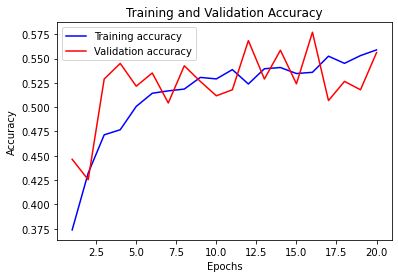

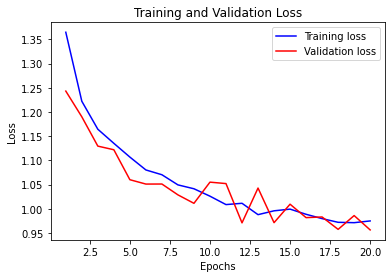

In [10]:
acc = history.history['accuracy']  
val_acc = history.history['val_accuracy']  
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plotting training and validation accuracies
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation losses
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
for epoch, accuracy, loss_value in zip(range(1, len(acc) + 1), acc, loss):
    print(f"Epoch {epoch}: Training Accuracy = {accuracy}, Training Loss = {loss_value}")

Epoch 1: Training Accuracy = 0.37373116612434387, Training Loss = 1.3646323680877686
Epoch 2: Training Accuracy = 0.4321747124195099, Training Loss = 1.2221051454544067
Epoch 3: Training Accuracy = 0.4715472161769867, Training Loss = 1.1642857789993286
Epoch 4: Training Accuracy = 0.4767763912677765, Training Loss = 1.135183334350586
Epoch 5: Training Accuracy = 0.5007690191268921, Training Loss = 1.106788158416748
Epoch 6: Training Accuracy = 0.5143032670021057, Training Loss = 1.080191731452942
Epoch 7: Training Accuracy = 0.5167640447616577, Training Loss = 1.070294737815857
Epoch 8: Training Accuracy = 0.5186096429824829, Training Loss = 1.049347996711731
Epoch 9: Training Accuracy = 0.5306059718132019, Training Loss = 1.041332483291626
Epoch 10: Training Accuracy = 0.5290679931640625, Training Loss = 1.0260205268859863
Epoch 11: Training Accuracy = 0.5386034846305847, Training Loss = 1.0086476802825928
Epoch 12: Training Accuracy = 0.5238388180732727, Training Loss = 1.01133513450

In [13]:
# Evaluate the model on test data
test_scores = model.evaluate(test_generator)
test_accuracy = test_scores[1]

# Print test accuracy
print(f"Test Accuracy: {test_accuracy}")

26/26 [==============================] - 6s 234ms/step - loss: 0.9334 - accuracy: 0.5573
Test Accuracy: 0.5573366284370422
